In [ ]:
# Set the working directory to where your file is located
setwd("C:/Sylvain_Billiard/Masters_Thesis_Work/pollen_allergen_genes/data/genomes/")




### data_bad_scripts

## \# Exons

In [19]:
# Read the data into R using whitespace as separator
PAG_stats_data <- read.table("data_bad_scripts/PAG_stats.txt", header = FALSE, sep = "", fill = TRUE, stringsAsFactors = FALSE)
q
# Select only the columns for geneid (column 1) and exon_count (column 4)
exon_data_PAG <- PAG_stats_data[, c(1, 4)]

# Assign column names for clarity
colnames(exon_data_PAG) <- c("geneid", "exon_count")

# View the filtered data
print(head(exon_data_PAG))

                                         geneid exon_count
1            maker-chr_M_12-augustus-gene-170.3          2
2            maker-chr_M_12-augustus-gene-171.2          2
3            maker-chr_M_12-augustus-gene-171.1          2
4 augustus_masked-chr_M_12-processed-gene-172.6          2
5            maker-chr_M_12-augustus-gene-170.2          3
6            maker-chr_M_12-augustus-gene-171.0          2


In [20]:
# Read the data into R using whitespace as separator
All_gene_stats_data <- read.table("data_bad_scripts/Pan_040_all_gene_stats_slurm.txt", header = FALSE, sep = "", fill = TRUE, stringsAsFactors = FALSE)

# Select only the columns for geneid (column 1) and exon_count (column 4)
exon_data_all <- All_gene_stats_data[, c(1, 4)]

# Assign column names for clarity
colnames(exon_data_all) <- c("geneid", "exon_count")

# View the filtered data
print(head(exon_data_all))

                            geneid exon_count
1 maker-chr_M_20-augustus-gene-0.0          3
2 maker-chr_M_20-augustus-gene-0.1          6
3 maker-chr_M_20-augustus-gene-0.2          7
4 maker-chr_M_20-augustus-gene-1.0         11
5 maker-chr_M_20-augustus-gene-1.1          5
6 maker-chr_M_20-augustus-gene-1.5          4


In [21]:
# Check the number of rows in each data frame
print(nrow(exon_data_PAG))
print(nrow(exon_data_all))


# remove the entries of the PAG data from the All gene data

exon_data_non_PAG <- exon_data_all[!exon_data_all$geneid %in% exon_data_PAG$geneid,]

# check the number of rows in the new data frame

print(nrow(exon_data_non_PAG))

[1] 15
[1] 26670
[1] 26655


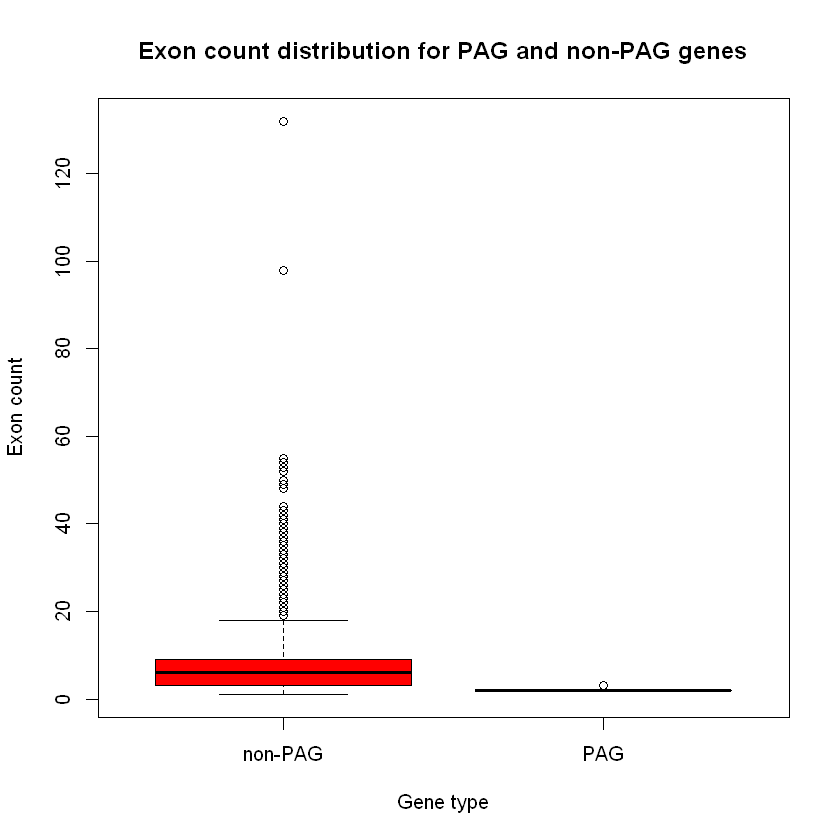

In [22]:
# now we compare the exon counts of the PAG and non-PAG genes
# create a boxplot of the exon counts for the PAG and non-PAG genes

# combine the data frames
exon_data_PAG$gene_type <- "PAG"
exon_data_non_PAG$gene_type <- "non-PAG"

exon_data_combined <- rbind(exon_data_PAG, exon_data_non_PAG)

# create a boxplot
boxplot(exon_count ~ gene_type, data = exon_data_combined, main = "Exon count distribution for PAG and non-PAG genes", xlab = "Gene type", ylab = "Exon count", col = c("red", "blue"))



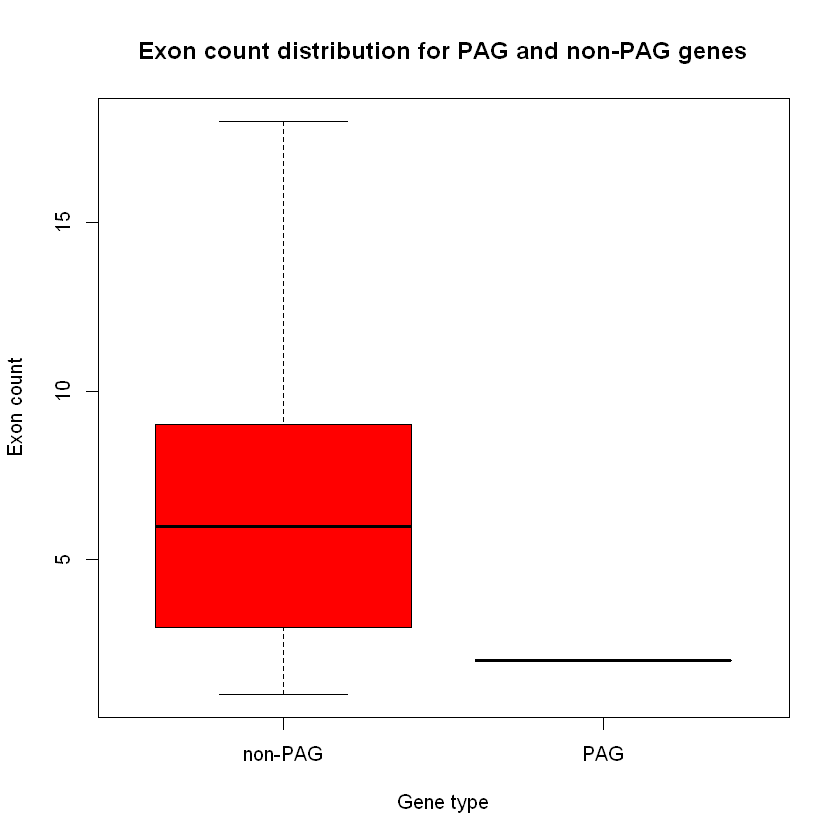

In [48]:
# boxplot withou outliers

boxplot(exon_count ~ gene_type, data = exon_data_combined, main = "Exon count distribution for PAG and non-PAG genes", xlab = "Gene type", ylab = "Exon count", col = c("red", "blue"), outline = FALSE)

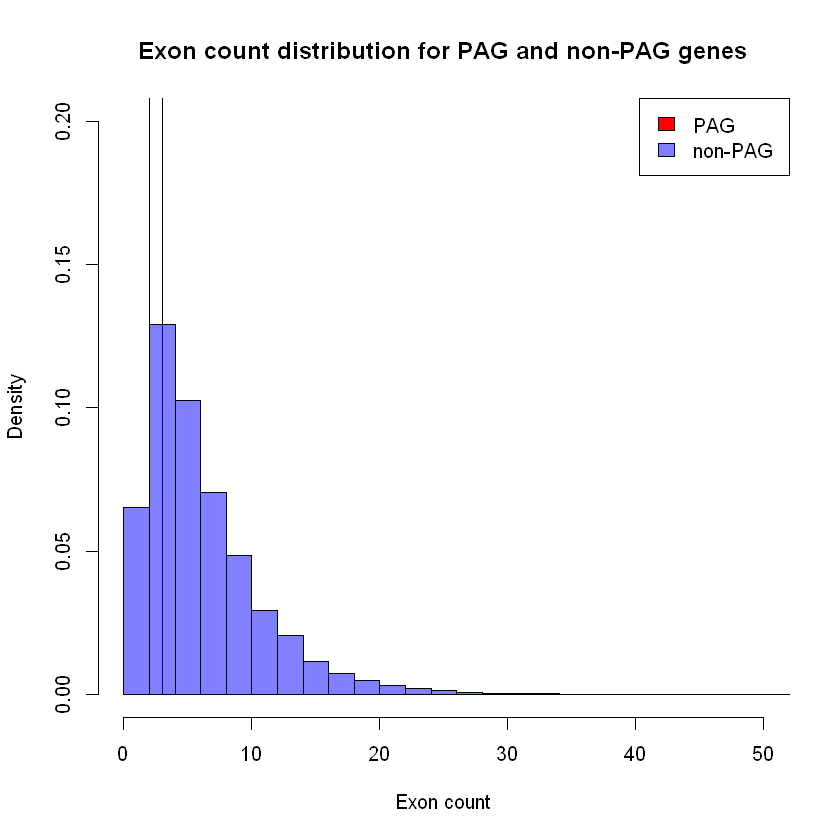

In [57]:
# also create a histogram of the exon counts for the PAG and non-PAG genes

# create a histogram
# make different transparency levels for the two histograms
# normalize the y-axis to make the comparison easier

hist(exon_data_PAG$exon_count, col = rgb(1, 0, 0, 1), xlim = c(0, 50), ylim = c(0, 0.2), breaks = 50, main = "Exon count distribution for PAG and non-PAG genes", xlab = "Exon count", ylab = "Density", probability = TRUE)
hist(exon_data_non_PAG$exon_count, col = rgb(0, 0, 1, 0.5), add = TRUE, breaks = 50, probability = TRUE)

# legend
legend("topright", legend = c("PAG", "non-PAG"), fill = c(rgb(1, 0, 0, 1), rgb(0, 0, 1, 0.5)))



In [37]:
# also get statistics for the exon counts of the PAG and non-PAG genes

# use summary statistics
summary(exon_data_PAG$exon_count)
summary(exon_data_non_PAG$exon_count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.133   2.000   3.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   6.000   6.787   9.000 132.000 

## [Exon] (Avg Exon length)

In [43]:
# Read the data into R using whitespace as separator
PAG_avg_exon_length_data <- read.table("data_bad_scripts/PAG_exon_length.txt", header = FALSE, sep = "", fill = TRUE, stringsAsFactors = FALSE)

# Assign column names for clarity
colnames(PAG_avg_exon_length_data) <- c("geneid", "avg_exon_length")

# View the filtered data
print(head(PAG_avg_exon_length_data))

                                         geneid avg_exon_length
1            maker-chr_M_12-augustus-gene-170.3             272
2            maker-chr_M_12-augustus-gene-171.2             261
3            maker-chr_M_12-augustus-gene-171.1             261
4 augustus_masked-chr_M_12-processed-gene-172.6             413
5            maker-chr_M_12-augustus-gene-170.2             212
6            maker-chr_M_12-augustus-gene-171.0             261


In [44]:
# Read the data into R using whitespace as separator
All_gene_avg_exon_length_data <- read.table("data_bad_scripts/Pan_040_all_gene_exon_length_slurm.txt", header = FALSE, sep = "", fill = TRUE, stringsAsFactors = FALSE)

# Assign column names for clarity
colnames(All_gene_avg_exon_length_data) <- c("geneid", "avg_exon_length")

# View the filtered data
print(head(All_gene_avg_exon_length_data))

                            geneid avg_exon_length
1 maker-chr_M_20-augustus-gene-0.0         751.667
2 maker-chr_M_20-augustus-gene-0.1         172.333
3 maker-chr_M_20-augustus-gene-0.2         111.286
4 maker-chr_M_20-augustus-gene-1.0         194.273
5 maker-chr_M_20-augustus-gene-1.1         274.200
6 maker-chr_M_20-augustus-gene-1.5         276.500


In [45]:
# remove the entries of the PAG data from the All gene data

non_PAG_avg_exon_length_data <- All_gene_avg_exon_length_data[!All_gene_avg_exon_length_data$geneid %in% PAG_avg_exon_length_data$geneid,]

print(nrow(non_PAG_avg_exon_length_data))

[1] 26655


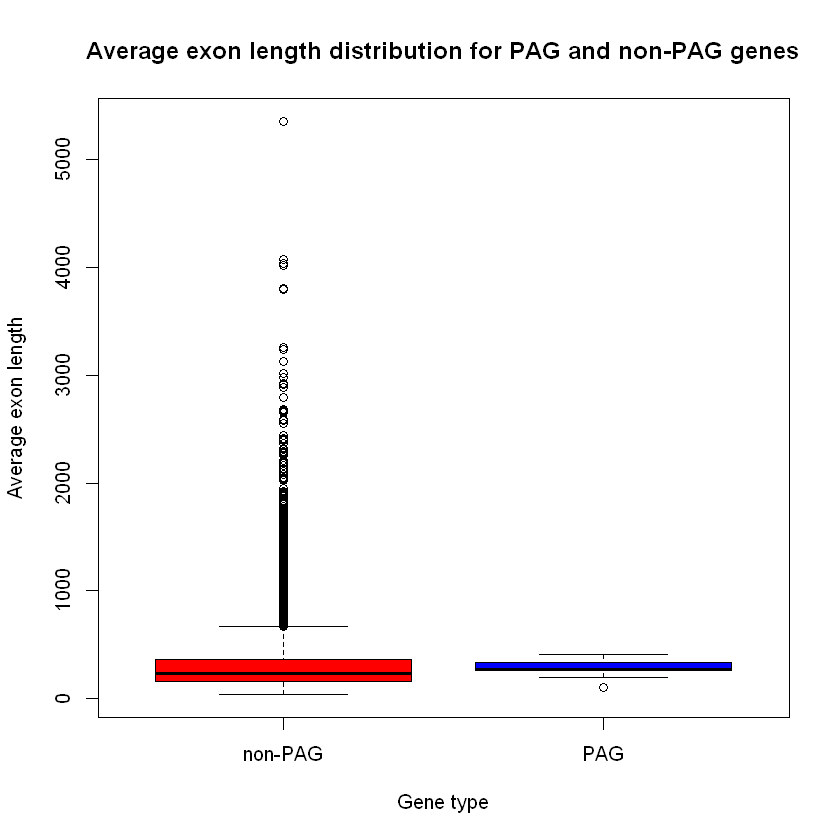

In [46]:
# boxplot

PAG_avg_exon_length_data$gene_type <- "PAG"
non_PAG_avg_exon_length_data$gene_type <- "non-PAG"

avg_exon_length_data_combined <- rbind(PAG_avg_exon_length_data, non_PAG_avg_exon_length_data)

boxplot(avg_exon_length ~ gene_type, data = avg_exon_length_data_combined, main = "Average exon length distribution for PAG and non-PAG genes", xlab = "Gene type", ylab = "Average exon length", col = c("red", "blue"))

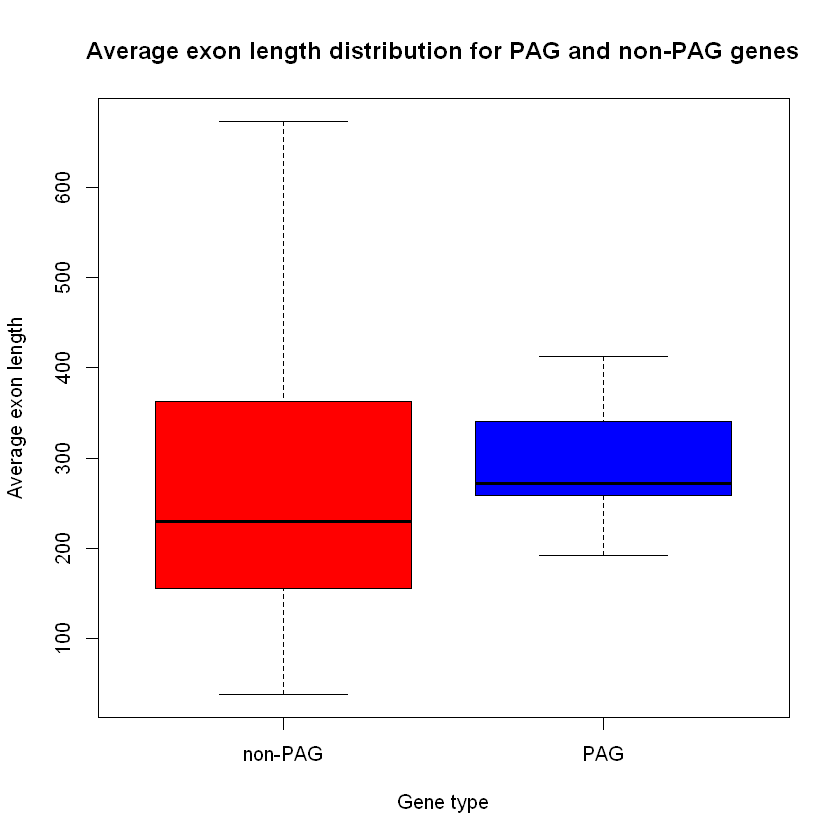

In [47]:
# boxplot withou outliers

boxplot(avg_exon_length ~ gene_type, data = avg_exon_length_data_combined, main = "Average exon length distribution for PAG and non-PAG genes", xlab = "Gene type", ylab = "Average exon length", col = c("red", "blue"), outline = FALSE)

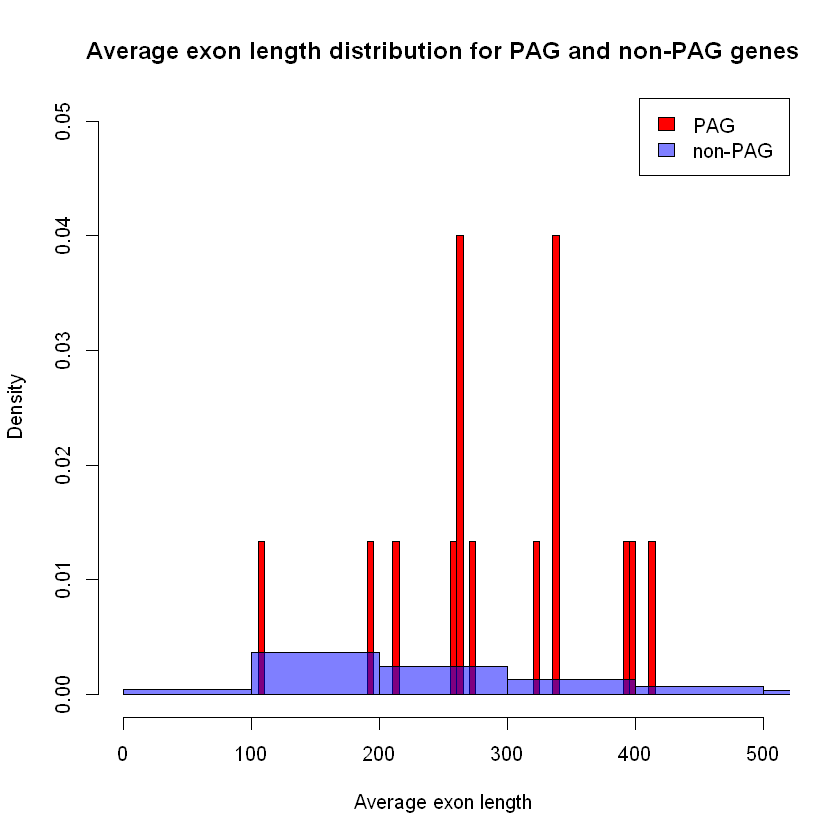

In [59]:
# histogram

hist(PAG_avg_exon_length_data$avg_exon_length, col = rgb(1, 0, 0, 1), xlim = c(0, 500), ylim = c(0, 0.05), breaks = 50, main = "Average exon length distribution for PAG and non-PAG genes", xlab = "Average exon length", ylab = "Density", probability = TRUE)
hist(non_PAG_avg_exon_length_data$avg_exon_length, col = rgb(0, 0, 1, 0.5), add = TRUE, breaks = 50, probability = TRUE)

# legend
legend("topright", legend = c("PAG", "non-PAG"), fill = c(rgb(1, 0, 0, 1), rgb(0, 0, 1, 0.5)))

In [60]:
# summary statistics


print("PAG average exon length")
summary(PAG_avg_exon_length_data$avg_exon_length)


print("non-PAG average exon length")
summary(non_PAG_avg_exon_length_data$avg_exon_length)


[1] "PAG average exon length"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    107     259     272     291     340     413 

[1] "non-PAG average exon length"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   38.0   156.0   229.9   307.2   362.8  5354.0 

## gene length

In [62]:
# Read the data into R using whitespace as separator
PAG_gl <- read.table("data_bad_scripts/PAG_length.txt", header = FALSE, sep = "", fill = TRUE, stringsAsFactors = FALSE)

# Assign column names for clarity
colnames(PAG_gl) <- c("geneid", "gene_length")

# View the filtered data
print(head(PAG_gl))

                                         geneid gene_length
1            maker-chr_M_12-augustus-gene-170.3        1072
2            maker-chr_M_12-augustus-gene-171.2         987
3            maker-chr_M_12-augustus-gene-171.1        1058
4 augustus_masked-chr_M_12-processed-gene-172.6        1333
5            maker-chr_M_12-augustus-gene-170.2        1793
6            maker-chr_M_12-augustus-gene-171.0        1034


In [63]:
# Read the data into R using whitespace as separator
All_gl <- read.table("data_bad_scripts/Pan_040_all_gene_length_slurm.txt", header = FALSE, sep = "", fill = TRUE, stringsAsFactors = FALSE)

# Assign column names for clarity
colnames(All_gl) <- c("geneid", "gene_length")

# View the filtered data
print(head(All_gl))

                            geneid gene_length
1 maker-chr_M_20-augustus-gene-0.0        3010
2 maker-chr_M_20-augustus-gene-0.1        1653
3 maker-chr_M_20-augustus-gene-0.2        3676
4 maker-chr_M_20-augustus-gene-1.0        8299
5 maker-chr_M_20-augustus-gene-1.1        4953
6 maker-chr_M_20-augustus-gene-1.5        2110


In [64]:
# remove the entries of the PAG data from the All gene data

non_PAG_gl <- All_gl[!All_gl$geneid %in% PAG_gl$geneid,]

print(nrow(non_PAG_gl))

[1] 26655


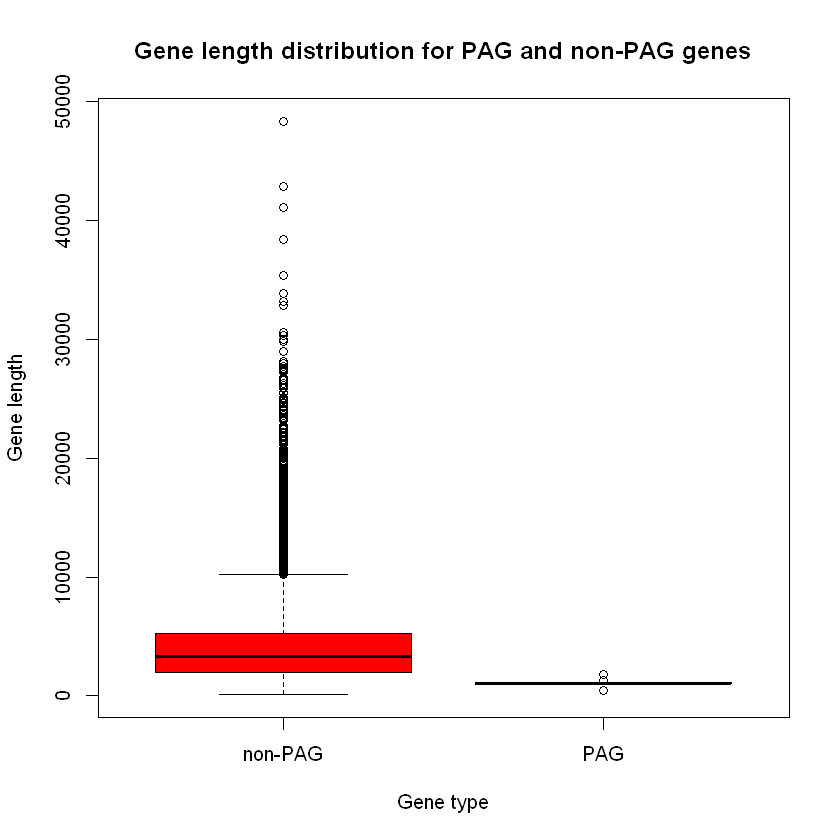

In [65]:
# boxplot

PAG_gl$gene_type <- "PAG"
non_PAG_gl$gene_type <- "non-PAG"

gl_combined <- rbind(PAG_gl, non_PAG_gl)

boxplot(gene_length ~ gene_type, data = gl_combined, main = "Gene length distribution for PAG and non-PAG genes", xlab = "Gene type", ylab = "Gene length", col = c("red", "bluqe"))

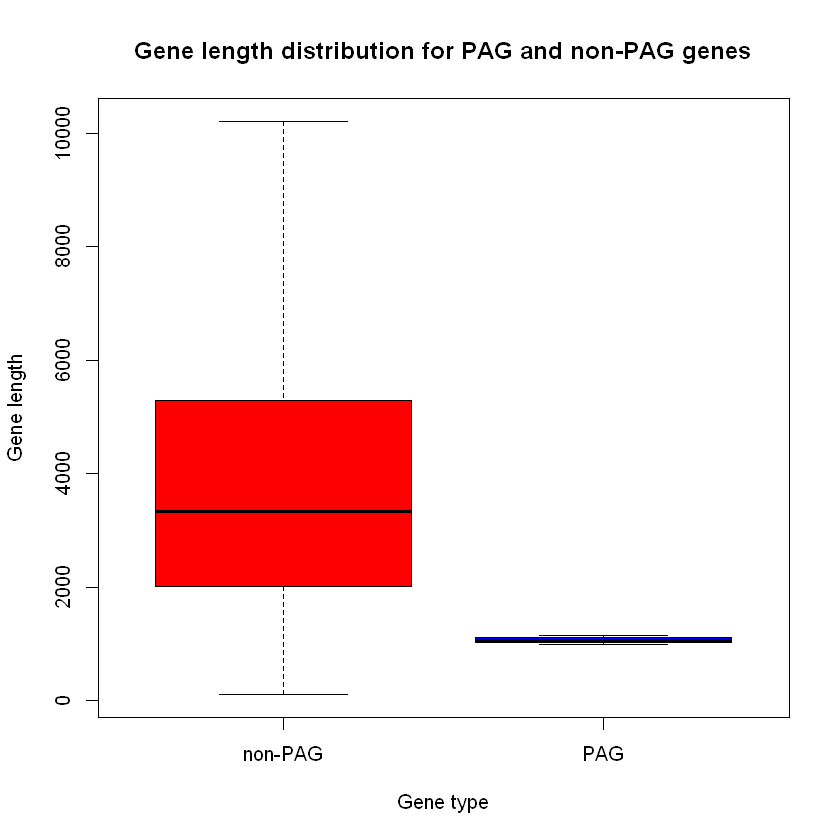

In [66]:
# boxplot withou outliers

boxplot(gene_length ~ gene_type, data = gl_combined, main = "Gene length distribution for PAG and non-PAG genes", xlab = "Gene type", ylab = "Gene length", col = c("red", "blue"), outline = FALSE)

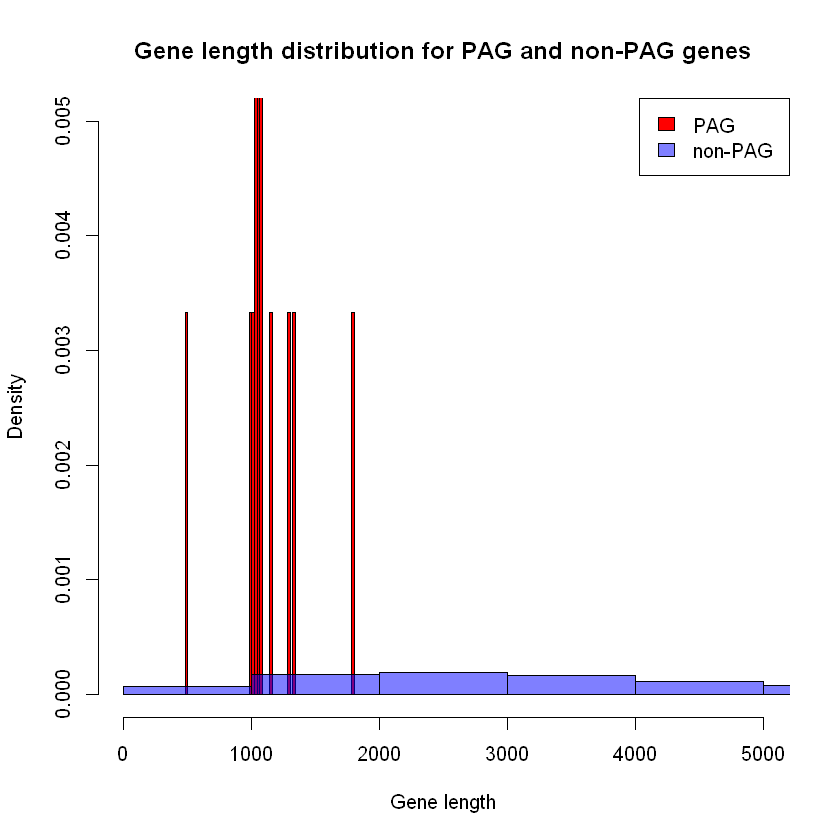

In [70]:
# histogram

hist(PAG_gl$gene_length, col = rgb(1, 0, 0, 1), xlim = c(0, 5000), ylim = c(0, 0.005), breaks = 50, main = "Gene length distribution for PAG and non-PAG genes", xlab = "Gene length", ylab = "Density", probability = TRUE)
hist(non_PAG_gl$gene_length, col = rgb(0, 0, 1, 0.5), add = TRUE, breaks = 50, probability = TRUE)

# legend
legend("topright", legend = c("PAG", "non-PAG"), fill = c(rgb(1, 0, 0, 1), rgb(0, 0, 1, 0.5)))

In [71]:
# summary statistics

print("PAG gene length")
summary(PAG_gl$gene_length)

print("non-PAG gene length")
summary(non_PAG_gl$gene_length)

[1] "PAG gene length"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    487    1032    1057    1098    1109    1793 

[1] "non-PAG gene length"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    104    2005    3329    4105    5289   48328 

###  results_Pan_040_gff_expl_anal

### Exons

In [36]:
exon_data <- read.table("results_Pan_040_gff_expl_anal/Pan_040_element_exon_lengths_marked.txt",header = FALSE, sep = "\t", fill = TRUE, stringsAsFactors = FALSE)
head(exon_data)

colnames(exon_data) <- c("exon_length", "gene_exon_id", "PAG")

head(exon_data)


,V1,V2,V3
,<int>,<chr>,<int>
1,63,ID=maker-chr_M_12-augustus-gene-106.15-mRNA-1:exon:49584;Parent=maker-chr_M_12-augustus-gene-106.15-mRNA-1,1
2,151,ID=maker-chr_M_12-augustus-gene-106.15-mRNA-1:exon:49583;Parent=maker-chr_M_12-augustus-gene-106.15-mRNA-1,1
3,575,ID=maker-chr_M_12-augustus-gene-170.1-mRNA-1:exon:50469;Parent=maker-chr_M_12-augustus-gene-170.1-mRNA-1,1
4,216,ID=maker-chr_M_12-augustus-gene-170.1-mRNA-1:exon:50468;Parent=maker-chr_M_12-augustus-gene-170.1-mRNA-1,1
5,237,ID=maker-chr_M_12-augustus-gene-170.3-mRNA-1:exon:50471;Parent=maker-chr_M_12-augustus-gene-170.3-mRNA-1,1
6,307,ID=maker-chr_M_12-augustus-gene-170.3-mRNA-1:exon:50470;Parent=maker-chr_M_12-augustus-gene-170.3-mRNA-1,1


,exon_length,gene_exon_id,PAG
,<int>,<chr>,<int>
1,63,ID=maker-chr_M_12-augustus-gene-106.15-mRNA-1:exon:49584;Parent=maker-chr_M_12-augustus-gene-106.15-mRNA-1,1
2,151,ID=maker-chr_M_12-augustus-gene-106.15-mRNA-1:exon:49583;Parent=maker-chr_M_12-augustus-gene-106.15-mRNA-1,1
3,575,ID=maker-chr_M_12-augustus-gene-170.1-mRNA-1:exon:50469;Parent=maker-chr_M_12-augustus-gene-170.1-mRNA-1,1
4,216,ID=maker-chr_M_12-augustus-gene-170.1-mRNA-1:exon:50468;Parent=maker-chr_M_12-augustus-gene-170.1-mRNA-1,1
5,237,ID=maker-chr_M_12-augustus-gene-170.3-mRNA-1:exon:50471;Parent=maker-chr_M_12-augustus-gene-170.3-mRNA-1,1
6,307,ID=maker-chr_M_12-augustus-gene-170.3-mRNA-1:exon:50470;Parent=maker-chr_M_12-augustus-gene-170.3-mRNA-1,1


: 

In [35]:
# import PAG_IDS and all gene IDS
PAG_IDS <- read.table("PAG_IDS.txt", header = FALSE, sep = "\t", fill = TRUE, stringsAsFactors = FALSE)
head(PAG_IDS)
colnames(PAG_IDS) <- c("geneid")

All_gene_IDS <- read.table("Pan_040_gene_IDS.txt", header = FALSE, sep = "\t", fill = TRUE, stringsAsFactors = FALSE) 
head(All_gene_IDS)
colnames(All_gene_IDS) <- c("geneid")

,V1
,<chr>
1,maker-chr_M_12-augustus-gene-170.3
2,maker-chr_M_12-augustus-gene-171.2
3,maker-chr_M_12-augustus-gene-171.1
4,augustus_masked-chr_M_12-processed-gene-172.6
5,maker-chr_M_12-augustus-gene-170.2
6,maker-chr_M_12-augustus-gene-171.0


,V1
,<chr>
1,maker-chr_M_20-augustus-gene-0.0
2,maker-chr_M_20-augustus-gene-0.1
3,maker-chr_M_20-augustus-gene-0.2
4,maker-chr_M_20-augustus-gene-1.0
5,maker-chr_M_20-augustus-gene-1.1
6,maker-chr_M_20-augustus-gene-1.5


In [10]:
install.packages("tidyverse")

Installing package into 'C:/Users/Ayush/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ayush\AppData\Local\Temp\RtmpQjOUu8\downloaded_packages


In [18]:
library(tidyverse)

In [19]:
# make a non-PAG data frame
non_PAG_IDS <- All_gene_IDS[!All_gene_IDS$geneid %in% PAG_IDS$geneid,]

In [ ]:
## find number of exons for each gene
# empty vector to store the number of exons